<a href="https://colab.research.google.com/github/yuira34/capstone_project/blob/main/capstone_project_A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# prototyping machine learning project from Dermnet dataset
this note book use for make prototype model to deterrmine the best model architecture. dataset that using from kaggle.com 
this notebook design for running in google colab.

### description of dataset 
- 

### purpose of the notebook
-

## download dataset
to download data, ensure that you install kaggle libraries. 

In [2]:
#!pip install kaggle
#terlebih dahulu untuk mendownload kaggle.json melalui kaggle.com
#!cp ~/content/kaggle.json ~/.kaggle/
#!chmod 600 ~/.kaggle/kaggle.json
# copy API download dataset command  di dataset kagle, kemudian paste di sini
!kaggle datasets download -d shubhamgoel27/dermnet

'kaggle' is not recognized as an internal or external command,
operable program or batch file.


  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73057 sha256=e8e97c1a1bcd981a42856b85237d78f65bcff2a4213b5a1787be749a3a9f918c
  Stored in directory: c:\users\cacc\appdata\local\pip\cache\wheels\29\da\11\144cc25aebdaeb4931b231e25fd34b394e6a5725cbb2f50106
Successfully built kaggle


In [ ]:
# dataset yang lain 
#!kaggle datasets download -d paoloripamonti/derma-diseases
#https://www.kaggle.com/datasets/paoloripamonti/derma-diseases

In [48]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\yuira\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [1]:
pip install PIL

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement PIL (from versions: none)
ERROR: No matching distribution found for PIL
You should consider upgrading via the 'c:\Users\yuira\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
pip install SciPy

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\yuira\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [49]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\yuira\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


## import libraries 

In [52]:
# libraries for extract and pre precessing data
import os, zipfile, PIL
# libraries for machine learning model
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop, Adam
#libraries for preprocessing data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#libraries for plotting
import numpy as np
import matplotlib.pyplot as plt
# libraries for save data
import datetime
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import MultiLabelBinarizer

## extract dataset and split it into train and test 
dermnet.zip already  split into train and test directoy, so it just need to extract

In [53]:
# local_zip = "/content/dermnet.zip"
extract_dir = "dermnet_dataset"
# zip_ref = zipfile.ZipFile(local_zip, 'r')
# zip_ref.extractall(extract_dir)
# zip_ref.close()

train_dir= os.path.join(extract_dir,"train")
test_dir= os.path.join(extract_dir,"test")

# data and image exploration
to explore feature of the image 

In [54]:
# train, test, and number sample each label exploration
labels= os.listdir(train_dir)
print(" the model has {} labels with is \n".format(len(labels)))
for nomor, label in enumerate(labels):
    print("{} {} have {} train data samples and {} test data samples".format(nomor, 
                                                                             label, 
                                                                             len(os.listdir(os.path.join(train_dir,label))),
                                                                             len(os.listdir(os.path.join(test_dir,label)))
                                                                            )
         )
# image exploration

image_sample_dir=[os.path.join(train_dir,label) for label in labels[:5]]
for dir_ in image_sample_dir:
    for img in os.listdir(dir_)[:2]:
        im= PIL.Image.open(os.path.join(dir_, img))# pass with the picture directory
        print("image \n format :{},size: {} , color: {} \n".format(im.format,im.size,im.mode))


 the model has 23 labels with is 

0 Acne and Rosacea Photos have 840 train data samples and 312 test data samples
1 Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions have 1149 train data samples and 288 test data samples
2 Atopic Dermatitis Photos have 489 train data samples and 123 test data samples
3 Bullous Disease Photos have 448 train data samples and 113 test data samples
4 Cellulitis Impetigo and other Bacterial Infections have 288 train data samples and 73 test data samples
5 Eczema Photos have 1235 train data samples and 309 test data samples
6 Exanthems and Drug Eruptions have 404 train data samples and 101 test data samples
7 Hair Loss Photos Alopecia and other Hair Diseases have 239 train data samples and 60 test data samples
8 Herpes HPV and other STDs Photos have 405 train data samples and 102 test data samples
9 Light Diseases and Disorders of Pigmentation have 568 train data samples and 143 test data samples
10 Lupus and other Connective Tissue disease

In [86]:
def generate_class_weights(class_series):
  class_labels = np.unique(class_series)
  class_weights = compute_class_weight(class_weight='balanced', classes=class_labels, y=class_series)
  return dict(zip(class_labels, class_weights))

## preprocessing data
it will process the raw data so that can use for data training. we will use class ImageDataGenerator and flow_from_directory() method. and include augmentation( rescale, sheer, zoom, etc)

Found 15557 images belonging to 23 classes.
Found 15557 images belonging to 23 classes.
(64, 128, 128, 3)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


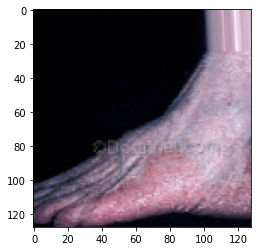

(64, 128, 128, 3)
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


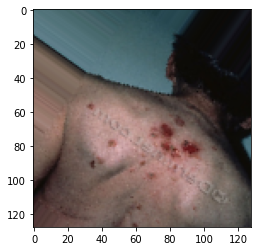

(64, 128, 128, 3)
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


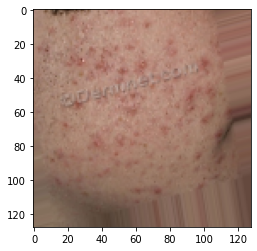

(64, 128, 128, 3)
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


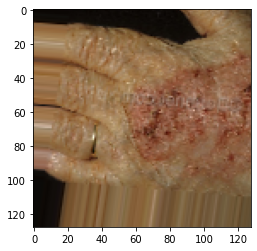

(64, 128, 128, 3)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


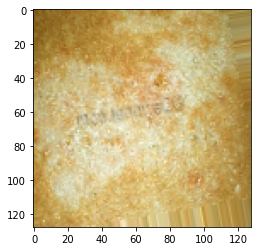

In [105]:
BATCH_SIZE = 64
IMAGE_SIZE = 128
train_datagen=ImageDataGenerator(rescale=1/255,
                                 rotation_range=40,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True,
                                 fill_mode="nearest"
                                )
train_generator=train_datagen.flow_from_directory(train_dir,
                                                  target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                  class_mode="categorical",#edit disini)
                                                  batch_size=BATCH_SIZE
                                                 )

test_datagen=ImageDataGenerator(rescale=1/255)
test_generator= test_datagen.flow_from_directory( train_dir,
                                                  target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                  class_mode="categorical",#edit disini)
                                                  batch_size=BATCH_SIZE
                                                )
#ploting versi image generator
for _ in range(5):
    img, label = train_generator.next()
    print(img.shape)   #  (1,256,256,3)
    print(label[0])
    plt.imshow(img[0])
    plt.show()

In [106]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                    shuffle = True,
                                                                    image_size = (IMAGE_SIZE,IMAGE_SIZE),
                                                                    batch_size = BATCH_SIZE 
                                                                   )
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                   shuffle = True,
                                                                   image_size = (IMAGE_SIZE,IMAGE_SIZE),
                                                                   batch_size = BATCH_SIZE  
                                                                  )

Found 15557 files belonging to 23 classes.
Found 4002 files belonging to 23 classes.


In [107]:
print(train_dataset)

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [109]:
#class names pakek image generator
class_names = train_generator.class_indices
class_names

{'Acne and Rosacea Photos': 0,
 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions': 1,
 'Atopic Dermatitis Photos': 2,
 'Bullous Disease Photos': 3,
 'Cellulitis Impetigo and other Bacterial Infections': 4,
 'Eczema Photos': 5,
 'Exanthems and Drug Eruptions': 6,
 'Hair Loss Photos Alopecia and other Hair Diseases': 7,
 'Herpes HPV and other STDs Photos': 8,
 'Light Diseases and Disorders of Pigmentation': 9,
 'Lupus and other Connective Tissue diseases': 10,
 'Melanoma Skin Cancer Nevi and Moles': 11,
 'Nail Fungus and other Nail Disease': 12,
 'Poison Ivy Photos and other Contact Dermatitis': 13,
 'Psoriasis pictures Lichen Planus and related diseases': 14,
 'Scabies Lyme Disease and other Infestations and Bites': 15,
 'Seborrheic Keratoses and other Benign Tumors': 16,
 'Systemic Disease': 17,
 'Tinea Ringworm Candidiasis and other Fungal Infections': 18,
 'Urticaria Hives': 19,
 'Vascular Tumors': 20,
 'Vasculitis Photos': 21,
 'Warts Molluscum and other Viral Inf

In [110]:
PATH = os.path.join(extract_dir, "train")
labels = os.listdir(PATH)
labels

['Acne and Rosacea Photos',
 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions',
 'Atopic Dermatitis Photos',
 'Bullous Disease Photos',
 'Cellulitis Impetigo and other Bacterial Infections',
 'Eczema Photos',
 'Exanthems and Drug Eruptions',
 'Hair Loss Photos Alopecia and other Hair Diseases',
 'Herpes HPV and other STDs Photos',
 'Light Diseases and Disorders of Pigmentation',
 'Lupus and other Connective Tissue diseases',
 'Melanoma Skin Cancer Nevi and Moles',
 'Nail Fungus and other Nail Disease',
 'Poison Ivy Photos and other Contact Dermatitis',
 'Psoriasis pictures Lichen Planus and related diseases',
 'Scabies Lyme Disease and other Infestations and Bites',
 'Seborrheic Keratoses and other Benign Tumors',
 'Systemic Disease',
 'Tinea Ringworm Candidiasis and other Fungal Infections',
 'Urticaria Hives',
 'Vascular Tumors',
 'Vasculitis Photos',
 'Warts Molluscum and other Viral Infections']

In [111]:
counts = [len(os.listdir(os.path.join(PATH, label))) for label in labels]
print(len(counts))
counts

23


[312,
 288,
 123,
 113,
 73,
 309,
 101,
 60,
 102,
 143,
 105,
 116,
 261,
 65,
 352,
 108,
 343,
 152,
 325,
 53,
 121,
 105,
 272]

In [120]:
train_dict = dict(zip(labels, counts))

In [121]:
import heapq
use_label = heapq.nlargest(10, train_dict, key=test_dict.get)
use_label

['Psoriasis pictures Lichen Planus and related diseases',
 'Seborrheic Keratoses and other Benign Tumors',
 'Tinea Ringworm Candidiasis and other Fungal Infections',
 'Acne and Rosacea Photos',
 'Eczema Photos',
 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions',
 'Warts Molluscum and other Viral Infections',
 'Nail Fungus and other Nail Disease',
 'Systemic Disease',
 'Light Diseases and Disorders of Pigmentation']

In [113]:
train_labels = [class_names[key] for key in train_dict for val in range(train_dict[key])]
train_labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [114]:
class_weight = generate_class_weights(train_labels)
class_weight

{0: 0.5576923076923077,
 1: 0.6041666666666666,
 2: 1.4146341463414633,
 3: 1.5398230088495575,
 4: 2.3835616438356166,
 5: 0.5631067961165048,
 6: 1.7227722772277227,
 7: 2.9,
 8: 1.7058823529411764,
 9: 1.2167832167832169,
 10: 1.6571428571428573,
 11: 1.5,
 12: 0.6666666666666666,
 13: 2.6769230769230767,
 14: 0.4943181818181818,
 15: 1.6111111111111112,
 16: 0.5072886297376094,
 17: 1.144736842105263,
 18: 0.5353846153846153,
 19: 3.2830188679245285,
 20: 1.43801652892562,
 21: 1.6571428571428573,
 22: 0.6397058823529411}

TypeError: Tensor is unhashable. Instead, use tensor.ref() as the key.

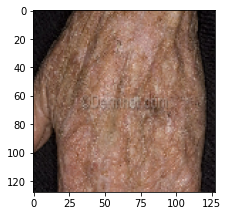

In [115]:
plt.figure(figsize = (15,15))
for image_batch, label_batch in train_dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]],fontsize = 8)
        plt.axis("off")

## build model architecture
it will make a few different model architecture and combination layers that will train then see the performance evaluation


In [118]:

model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(BATCH_SIZE, (3,3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    
                                    tf.keras.layers.Conv2D(BATCH_SIZE, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    
                                    tf.keras.layers.Conv2D(BATCH_SIZE, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    
                                    # tf.keras.layers.Dropout(0.2),
                                    
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(len(labels), activation='softmax')
])
model.summary()
model.compile(loss="categorical_crossentropy",optimizer=Adam(learning_rate=0.0001),metrics=["accuracy"])

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_55 (Conv2D)          (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d_55 (MaxPoolin  (None, 63, 63, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_56 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_56 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_57 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_57 (MaxPoolin  (None, 14, 14, 64)     

### model1

In [ ]:
model1=tf.keras.models.Sequential([tf.keras.layers.Conv2D(32,(3,3),activation="relu",input_shape=(224,224,3)),#edit sesuai dengan ukuran target),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   #2
                                   tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   #3
                                   tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   #4
                                   tf.keras.layers.Conv2D(128,(3,3),activation="relu"),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   #5
                                   tf.keras.layers.Conv2D(256,(3,3),activation="relu"),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   #6
                                   tf.keras.layers.Conv2D(512,(3,3),activation="relu"),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   # dropout layers
                                   tf.keras.layers.Dropout(0.2),
                                   #dense
                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(512,activation="relu"),
                                   tf.keras.layers.Dense(len(class_names),activation="softmax")
                                   
                                  ])
model1.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

### model2

In [ ]:
model2=tf.keras.models.Sequential([tf.keras.layers.Conv2D(32,(3,3),activation="relu",input_shape=(224,224,3)),#edit sesuai dengan ukuran target),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   #2
                                   tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   #3
                                   tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   #4
                                   tf.keras.layers.Conv2D(128,(3,3),activation="relu"),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   #5
                                   tf.keras.layers.Conv2D(256,(3,3),activation="relu"),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   #6
                                   tf.keras.layers.Conv2D(512,(3,3),activation="relu"),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   # dropout layers
                                   tf.keras.layers.Dropout(0.2),
                                   #dense
                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(512,activation="relu"),
                                   tf.keras.layers.Dense(23,activation="softmax")
                                   
                                  ])
model1.compile(loss="categorical_crossentropy", optimizer=RMSprop(learning_rate=0.0001),metrics=['accuracy'])

### model3

In [ ]:
model3= tf.keras.models.Sequential([tf.keras.layers.Conv2D(64,(18,18), activation="relu",input_shape=(720,480,1)),
                                    tf.keras.layers.MaxPooling2D(8,8),
                                    #2 
                                    tf.keras.layers.Conv2D(64,(18,18),activation="relu"),
                                    tf.keras.layers.MaxPooling2D(8,8),
                                    #3
                                   tf.keras.layers.Conv2D(64,(18,18),activation="relu"),
                                   tf.keras.layers.MaxPooling2D(4,4),
                                   #4
                                   tf.keras.layers.Conv2D(128,(9,9),activation="relu"),
                                   tf.keras.layers.MaxPooling2D(4,4),
                                   #5
                                   tf.keras.layers.Conv2D(256,(9,9),activation="relu"),
                                   tf.keras.layers.MaxPooling2D(4,4),
                                   #6
                                   tf.keras.layers.Conv2D(512,(3,3),activation="relu"),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   # dropout layers
                                   tf.keras.layers.Dropout(0.2),
                                   #dense
                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(512,activation="relu"),
                                   tf.keras.layers.Dense(23,activation="softmax")
                                   ])
model3.compile(loss="categorical_crossentropy", optimizers=Adam(learning_rate=0.00001), metrics=['accuracy'])

## train
train each model above with the same parameter 
* step_per_epoch= 10
* epoch = 100
* batch = 32
* verbose= 1

In [119]:
history=model.fit(train_generator,
                  epochs=100,
                  class_weight=class_weight,
                  validation_data=test_generator)
#history1=model1.fit(train_generator,
 #                   steps_per_epoch=10,
#                    epochs=100,
 #                   verbose=1,
  #                  validation_data=test_generator,
   #                 validation_steps=10)#fill parameter here)
#history2=model2.fit(train_generator,
 #                   steps_per_epoch=10,
  #                  epochs=100,
   #                 verbose=1,
    #                validation_data=test_generator,
     #               validation_steps=10)#fill parameter here)

# history3=model3.fit(#fill parameter here)

Epoch 1/50
244/244 [==============================] - 146s 585ms/step - loss: 3.1119 - accuracy: 0.0688 - val_loss: 3.0303 - val_accuracy: 0.1198
Epoch 2/50
244/244 [==============================] - 142s 580ms/step - loss: 2.9790 - accuracy: 0.1153 - val_loss: 2.9589 - val_accuracy: 0.1365
Epoch 3/50
244/244 [==============================] - 142s 580ms/step - loss: 2.9203 - accuracy: 0.1306 - val_loss: 2.9007 - val_accuracy: 0.1364
Epoch 4/50
244/244 [==============================] - 143s 583ms/step - loss: 2.8873 - accuracy: 0.1397 - val_loss: 2.9698 - val_accuracy: 0.1186
Epoch 5/50
244/244 [==============================] - 142s 580ms/step - loss: 2.8508 - accuracy: 0.1505 - val_loss: 2.9055 - val_accuracy: 0.1266
Epoch 6/50
244/244 [==============================] - 142s 581ms/step - loss: 2.8250 - accuracy: 0.1594 - val_loss: 2.8304 - val_accuracy: 0.1667
Epoch 7/50
244/244 [==============================] - 142s 580ms/step - loss: 2.8037 - accuracy: 0.1663 - val_loss: 2.7740 -

## build function for plot the peformace per epoch 
function perform_plot will plot the performance per epoch then will passed by history then it will reusable

In [ ]:
def perform_plot(history):
    #edit here
    """
    this function use for plot model performance i.e loss and accuracy from train and validation data
    this plot will used for evaluate model performance and check overfitting
    """
    #plot the model result
    accuracy=history.history['accuracy']
    validation_accuracy=history.history['val_accuracy']
    loss= history.history['loss']
    validation_loss=history.history['val_loss']
    
    epoch=range(len(accuracy))
    
    #plot accuracy
    plt.plot(epoch,accuracy,'r',label="Training accuracy")
    plt.plot(epoch,validation_accuracy,'b',label="Validation accuracy")
    plt.title("Training and Validation accuracy")
    plt.legend()
    
    plt.figure()
    plt.plot(epoch,loss,'r',label="Training loss")
    plt.plot(epoch,validation_loss,'b', label="Validation loss")
    plt.title("training and validation loss")
    
    plt.legend()
    plt.show()

## evaluate each model
plot the models performance then evaluate the best model. and make sure that validation accuracy greater than 80. if not, make a new model architecure

In [5]:
#history= [ history1, history2]
#for hist in history:
 #   perform_plot(hist)
  #  plt.figure()
perform_plot(history)

## save weight and bin file from the best model
this bin and wight file will used for next process in this project( tranfer learning)

In [6]:
# save weight model
model.save_weights("best_model.h5")

## save models, convert to tf.lite, and save tf lite model 

export the save model

In [ ]:

export_dir = 'saved_model/1'# edit jadi path drive
tf.saved_model.save(model, export_dir)

In [ ]:
%%bash -s $RPS_SAVED_MODEL
saved_model_cli show --dir $1 --tag_set serve --signature_def serving_default

In [ ]:
loaded = tf.saved_model.load(RPS_SAVED_MODEL)
print(list(loaded.signatures.keys()))
infer = loaded.signatures["serving_default"]
print(infer.structured_input_signature)
print(infer.structured_outputs)

convert model to tensorflow lite

In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()

In [ ]:
# save tensorflow lite model
#tflite_model_file = pathlib.Path('model.tflite')
#tflite_model_file.write_bytes(tflite_model)
tflite_model_file = 'converted_model.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

## Test the TFLite Model Using the Python Interpreter

In [ ]:
# Load TFLite model and allocate tensors.
with open(tflite_model_file, 'rb') as fid:
    tflite_model = fid.read()
    
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]["index"]
output_index = interpreter.get_output_details()[0]["index"]

In [ ]:
predictions = []

test_labels, test_imgs = [], []
for img, label in tqdm(test_batches.take(10)):
    interpreter.set_tensor(input_index, img)
    interpreter.invoke()
    predictions.append(interpreter.get_tensor(output_index))
    
    test_labels.append(label.numpy()[0])
    test_imgs.append(img)

In [ ]:
#@title Utility functions for plotting
# Utilities for plotting

class_names = labels

def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    img = np.squeeze(img)
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    
    print(type(predicted_label), type(true_label))
    
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]), color=color)

In [ ]:
#@title Visualize the outputs { run: "auto" }
index = 0 #@param {type:"slider", min:0, max:9, step:1}
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(index, predictions, test_labels, test_imgs)
plt.show()

create fie for save labels

In [ ]:
with open('labels.txt', 'w') as f:
    f.write('\n'.join(class_names))

In [ ]:
try:
    from google.colab import files
    files.download('converted_model.tflite')
    files.download('labels.txt')
except:
    pass

## Prepare the Test Images for Download 

In [ ]:
!mkdir -p test_images

In [ ]:
!mkdir -p saved_model
model.save('saved_model/my_model')
loaded_model = keras.models.load_model('/content/ckpt/best3.h5')

In [ ]:
from PIL import Image

for index, (image, label) in enumerate(test_batches.take(50)):
    image = tf.cast(image * 255.0, tf.uint8)
    image = tf.squeeze(image).numpy()
    pil_image = Image.fromarray(image)
    pil_image.save('test_images/{}_{}.jpg'.format(class_names[label[0]], index))

In [ ]:
!ls test_images
!zip -qq rps_test_images.zip -r test_images/

In [ ]:
try:
    files.download('rps_test_images.zip')
except:
    pass